# Question 1

In [1]:
# Imports
from coc131_cw import COC131
import matplotlib.pyplot as plt
import numpy as np

# Instantiate the class
cw_class = COC131()                               # Initially sets up self.x and self.y as None so that it is ready to be filled by q1()

# Providing a sample image
filedirectory = "AnnualCrop/AnnualCrop_1.jpg"     # Loads and flattens a single specific image
res1, res2 = cw_class.q1(filename=filedirectory)  # Loads all the images and labels from the data set and puts them into res1 and res2

# Print dataset info
print('Total Samples Loaded:', len(cw_class.x))           # Shows how many images were loaded in total
print('Dataset Shape (self.x):', cw_class.x.shape)        # Displays the shape of the dataset in the format of (no. of images, each 32x32 pixels with 3 color channels)
print('Unique Labels (self.y):', np.unique(cw_class.y))   # Lists all the different classes (labels) that are found in the dataset
print('Label of Sample Image:', res2)                     # Shows the class label of the specific image that its loaded

Total Samples Loaded: 27000
Dataset Shape (self.x): (27000, 32, 32, 3)
Unique Labels (self.y): ['AnnualCrop' 'Forest' 'HerbaceousVegetation' 'Highway' 'Industrial'
 'Pasture' 'PermanentCrop' 'Residential' 'River' 'SeaLake']
Label of Sample Image: AnnualCrop


# Question 2

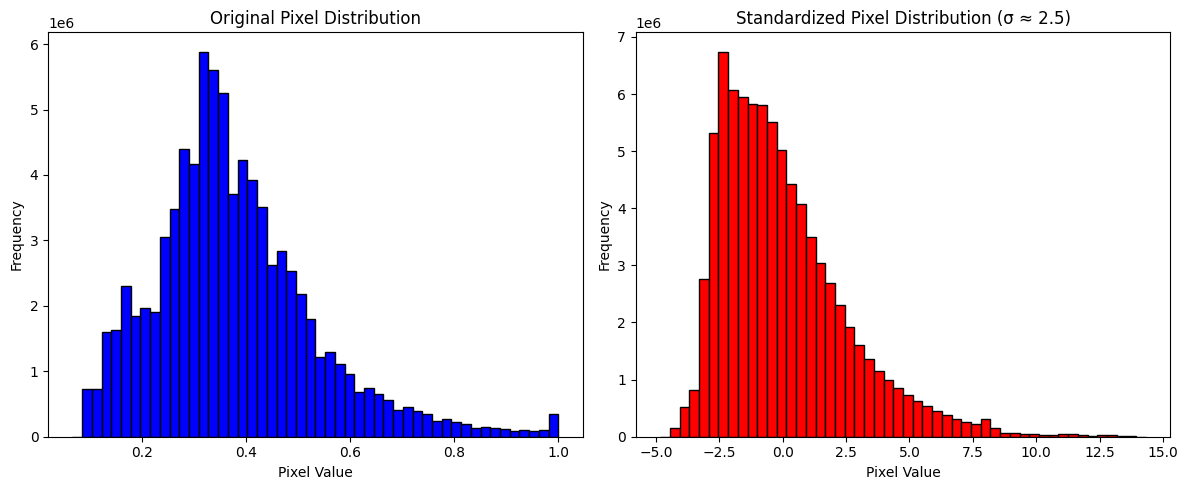

In [2]:
# Instantiate the class and load data
cw_class = COC131()
cw_class.q1()

# Using all images and flattened
data = cw_class.x.reshape(len(cw_class.x), -1)         # Converts each image from shape (32, 32, 3) to a 1D array length of 3072

# Applying the standardize value
res1, res2 = cw_class.q2(data)                         # Calling function q2() for it to standardize

# Visualization of before and after standardization
plt.figure(figsize=(12, 5))                            

# Before graph
plt.subplot(1, 2, 1)
plt.hist(data.ravel(), bins=50, color='blue', edgecolor='black')    # Flattens the whole dataset into 1D for easy plotting
plt.title('Original Pixel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# After graph
plt.subplot(1, 2, 2)
plt.hist(res2.ravel(), bins=50, color='red', edgecolor='black')     # Flattens the whole dataset into 1D for easy plotting
plt.title('Standardized Pixel Distribution (σ ≈ 2.5)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Output of graph and file saving
plt.tight_layout()                     # So that labels dont overlap
plt.savefig('q2.png', dpi=300)
plt.show()

# Question 3

Best Hyperparameter: {'hidden_layer_sizes': (100, 200, 200), 'learning_rate_init': 0.001, 'alpha': 0.001}
Final Training Accuracy: 95.7%
Final Testing Accuracy: 64.4%


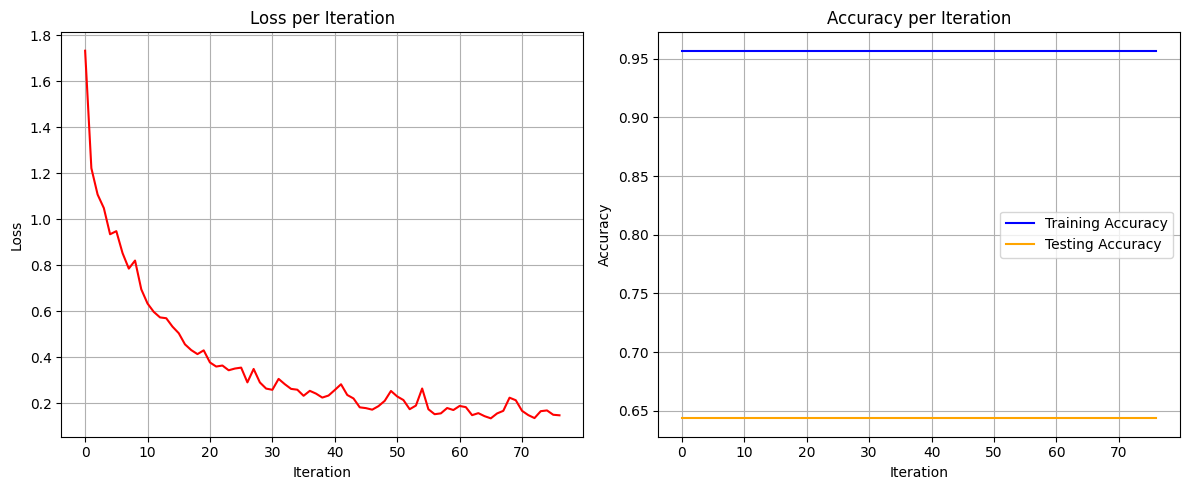

In [ ]:
# Call the python file and load dataset
cw_class = COC131()
cw_class.q1()

# Define the hyperparameter options
hyperparams = {
    'hidden_layer_sizes': [(100, 100), (100, 100, 200), (100, 200, 200)],  # These are the assigned values that the model will loop through
    'learning_rate_init': [0.001, 0.005],
    'alpha': [0.0001, 0.001]
}

# Train and evaluate the model using q3 function
model, loss_curve, training_accuracy, testing_accuracy = cw_class.q3(test_size=0.3, hyperparam=hyperparams)

# Print results
print('Best Hyperparameter:', cw_class.optimal_hyperparam)                      # The best result will then be appended to the optimal hyperparam array that is made in the python file
print('Final Training Accuracy: {:.1f}%'.format(training_accuracy[-1] * 100))   # Taking in the last value from training accuracy and it is converted to a percentage to the first significant figure
print('Final Testing Accuracy: {:.1f}%'.format(testing_accuracy[-1] * 100))     # Same concept but this time its for the testing accuracy

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(loss_curve, label='Loss', color='red')
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy', color='blue')
plt.plot(testing_accuracy, label='Testing Accuracy', color='orange')
plt.title('Accuracy per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Output of graph and file saving
plt.tight_layout()
plt.savefig('q3.png', dpi=300)
plt.show()

# Question 4

Training model with alpha = 0
Training model with alpha = 0.001
Training model with alpha = 0.005
Training model with alpha = 0.01
Training model with alpha = 0.05
Training model with alpha = 0.1
Training model with alpha = 0.5
Training model with alpha = 1
Training model with alpha = 2
Training model with alpha = 5
Training model with alpha = 10
Training model with alpha = 50
Training model with alpha = 100


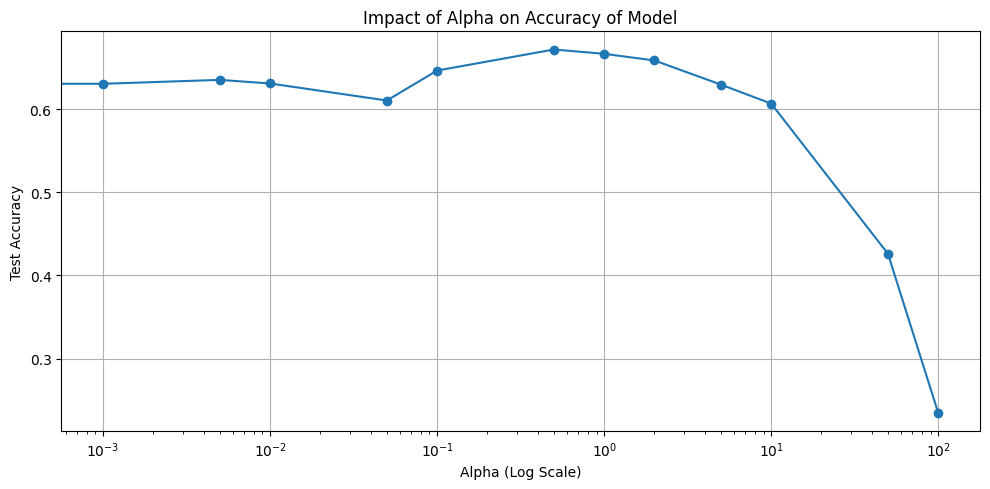

In [ ]:
# Call the python file and load dataset
cw_class = COC131()
cw_class.q1()

# Call q4 to get the test accuracy for each alpha value
alpha_values = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 50, 100]  # Taking the alpha values that are needed to be tested
accuracies = cw_class.q4()                                                    # Returns a NumPy array of accuracy values

# Plotting Alpha vs. Accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(alpha_values, accuracies, marker='o')
plt.xscale('log')
plt.title('Impact of Alpha on Accuracy of Model')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Test Accuracy')
plt.grid(True)

# Saving and show plot
plt.tight_layout()
plt.savefig('q4.png', dpi=300)
plt.show()

# Question 5

C:\Users\Harsya\AppData\Local\Temp\ipykernel_33540\3554584004.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=label)


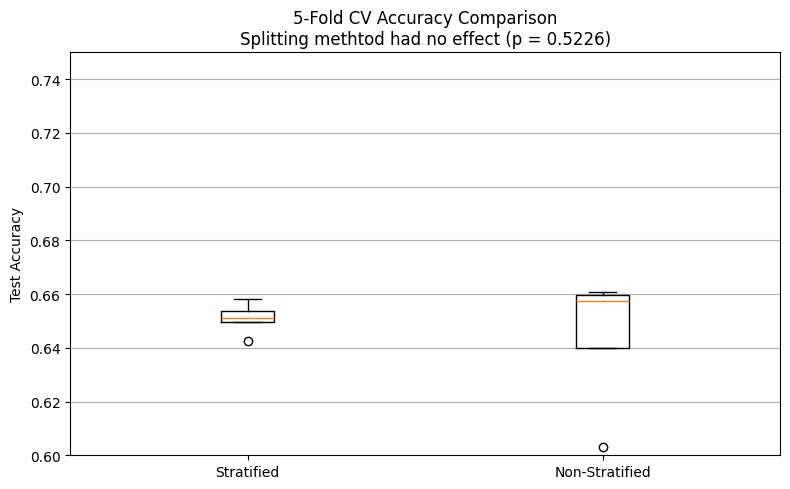

Mean Accuracy (Stratified CV): 0.6509
Mean Accuracy (Non-Stratified CV): 0.6442
P-value: 0.5226
Conclusion: Splitting methtod had no effect


In [ ]:
# Call the python file and load dataset
cw_class = COC131()
cw_class.q1()

# Q5 and unpack all return values, including per-fold scores
strat_mean, non_strat_mean, p_value, conclusion, start_scores, non_strat_scores = cw_class.q5()  # Taking the return values that are set in function q5()

# Combining fold-level scores for boxplot
data = [start_scores, non_strat_scores]       # As both non and start scores are a list/array of 5 accuracy scores, both are combined to be used in the box plot
label = ["Stratified", "Non-Stratified"]      # Labels created for the graph plot

# Ploting the values
plt.figure(figsize=(8, 5))
plt.boxplot(data, labels=label)
plt.title(f'5-Fold CV Accuracy Comparison\n{conclusion} (p = {p_value:.4f})')    # The title of the graph followed by the conclusion of the method with the p value rounded to 4 sig figs
plt.ylabel('Test Accuracy')
plt.ylim(0.6, 0.75)                                                              # Adjusted y value in order for a clear representation of the graph
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('q5.png', dpi=300)
plt.show()

# Showcase of result summary
print(f'Mean Accuracy (Stratified CV): {strat_mean:.4f}')
print(f'Mean Accuracy (Non-Stratified CV): {non_strat_mean:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'Conclusion: {conclusion}')

# Question 6

C:\Users\Harsya\AppData\Local\Temp\ipykernel_2032\3735840786.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colours = plt.cm.get_cmap("tab10", len(uniqie_labels))


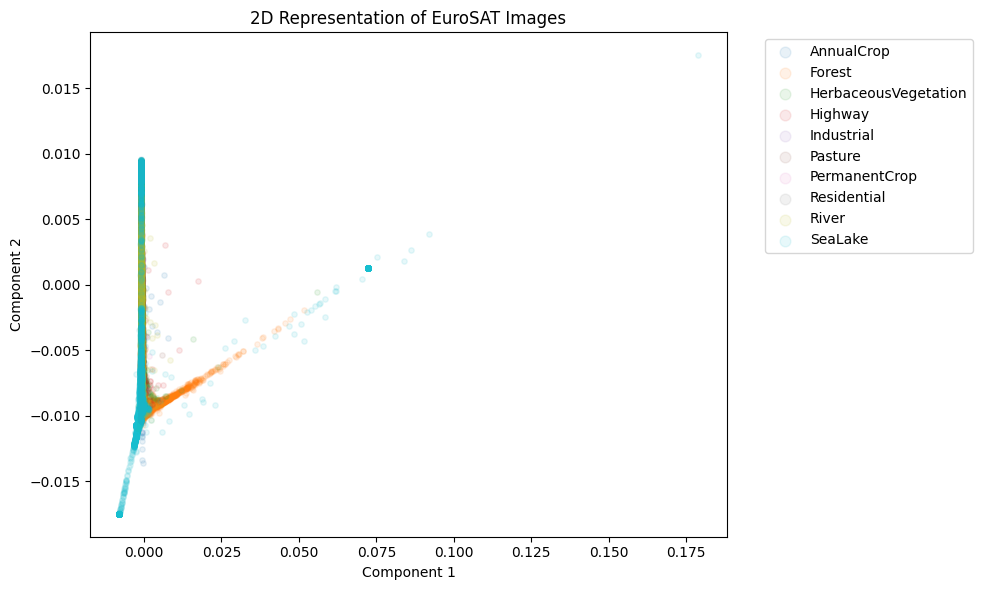

In [ ]:
# Call the python file and load dataset
cw_class = COC131()
cw_class.q1()

# Get the 2D representation using LLE
lle_embedded = cw_class.q6()                                  # Calls the function from q6() that applies LLE to reduce the image data to 2D and returns a Numpy array of lle_embedded in the shape of (n_sampels, 2)

# Prepare the labels for colouring
labels = cw_class.y                                           # Holding the folder name for each image
unique_labels = np.unique(labels)                             # Finds all unique class name
colours = plt.cm.get_cmap('tab10', len(unique_labels))        # Generates a colour map using matpolib's tab10, with one per class

# Plot the 2D projection
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):                                                      # Looping through each unique class label
    index = labels == label                                                                    # Creating a boolean for samples that belong to the current class
    plt.scatter(lle_embedded[index, 0], lle_embedded[index, 1], s=15, label=label, alpha=0.1)  # Formatting is as follows: x value (1st component of the LLE data), y value (2nd component of the LLE data), 
                                                                                               # setting set size to 5, making a lagend for each class label, applying transparancy for overlap visibility

# Showing the plot
plt.title('2D Representation of EuroSAT Images')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('q6.png', dpi=300)
plt.show()